**1: EXPLORATION OF DATASET**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

**Step1 : Read the file train.csv into Python and print a few rows.**

In [2]:
data=pd.read_csv("train.csv",sep=",")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Step2: Calculate the number of surviving/non-surviving passengers and display it as a bar plot.**

<AxesSubplot:xlabel='Survived', ylabel='count'>

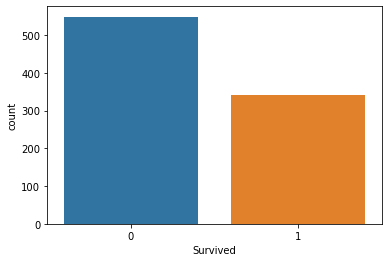

In [5]:
sns.countplot(x="Survived",data=data) #### Nonsurviving passenger are more than survived passenger

**Step3: Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.**

<AxesSubplot:xlabel='Survived', ylabel='count'>

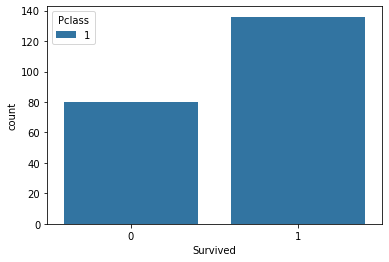

In [6]:
sns.countplot(x="Survived",hue="Pclass",data=(data[data["Pclass"]==1]))

**Step4: Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.**

<AxesSubplot:xlabel='Survived', ylabel='count'>

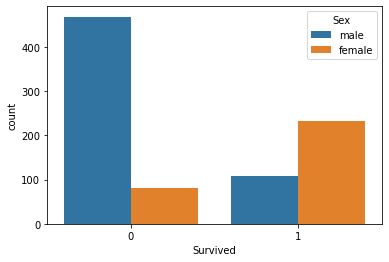

In [7]:
sns.countplot(x="Survived",hue="Sex",data=data)


<AxesSubplot:xlabel='Survived', ylabel='count'>

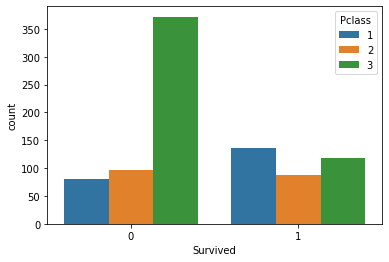

In [8]:
sns.countplot(x="Survived",hue="Pclass",data=data)

**Step5: Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.**

<AxesSubplot:ylabel='Frequency'>

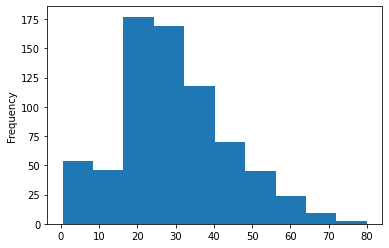

In [9]:
data["Age"].plot.hist()


In [10]:
data.groupby(["Age"])[["Survived"]].count()

,Survived
Age,
0.42,1
0.67,1
0.75,2
0.83,2
0.92,1
...,...
70.00,2
70.50,1
71.00,2


**Step6: Calculate the average age for survived and drowned passengers separately.**

In [11]:
mean_ages = data.groupby(by="Survived")['Age'].mean()
mean_ages

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

**Step7:Replace missing age values by the mean age.**


In [12]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
data["Age"].fillna(data["Age"].mean(),inplace=True)

In [14]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Step8) Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.**

In [15]:
data.groupby(["Pclass","Sex","Survived"])["Survived"].count()



Pclass  Sex     Survived
1       female  0             3
                1            91
        male    0            77
                1            45
2       female  0             6
                1            70
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

**2: FEATURE ENGINEERING**

#Missing values of the Age Column are replaced by mean of the Age Column value

In [16]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
data.dtypes #The object values should turn into float or integer data types

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<AxesSubplot:>

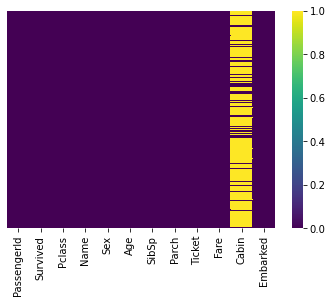

In [18]:
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis")

####String columns(Name) is removed.

In [19]:
data.drop(["Name"],axis=1,inplace=True)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.000000,0,0,111369,30.0000,C148,C


In [20]:
data.isnull().sum() #missing values of Age columns are replaced by the mean of Age values

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#Working on Age Column

In [21]:
data["Age"].isnull().sum()

0

In [22]:
data["Age"]=data["Age"].astype(int)

In [23]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Age', ylabel='count'>

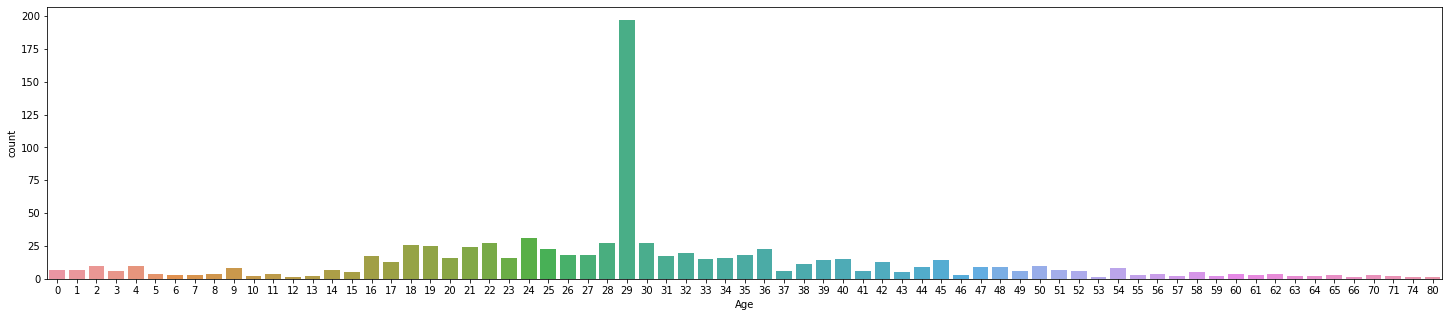

In [24]:
fig=plt.figure(figsize=(25,5))
sns.countplot(x="Age",data=data)


In [25]:
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer

In [26]:
kbins = KBinsDiscretizer(n_bins=4, encode='onehot-dense', strategy='uniform')

columns = data[['Age']]
columns

,Age
0,22
1,38
2,26
3,35
4,35
...,...
886,27
887,19
888,29
889,26


In [27]:
kbins.fit(columns)
t = kbins.transform(columns)
print(t.shape)
print()

(891, 4)



In [28]:
kbins.bin_edges_

array([array([ 0., 20., 40., 60., 80.])], dtype=object)

In [29]:
edges = kbins.bin_edges_[0].round(1)
labels = []
for i in range(len(edges)-1):
    edge1 = edges[i]
    edge2 = edges[i+1]
    labels.append(f"{edge1}_to_{edge2}")

In [30]:
df_bins = pd.DataFrame(t, columns=labels)
print(df_bins)

     0.0_to_20.0  20.0_to_40.0  40.0_to_60.0  60.0_to_80.0
0            0.0           1.0           0.0           0.0
1            0.0           1.0           0.0           0.0
2            0.0           1.0           0.0           0.0
3            0.0           1.0           0.0           0.0
4            0.0           1.0           0.0           0.0
..           ...           ...           ...           ...
886          0.0           1.0           0.0           0.0
887          1.0           0.0           0.0           0.0
888          0.0           1.0           0.0           0.0
889          0.0           1.0           0.0           0.0
890          0.0           1.0           0.0           0.0

[891 rows x 4 columns]


drop of Age Column 
instead of age column we can insert these bining columns.

In [31]:
data.drop(["Age"],axis=1,inplace=True)


In [32]:
data

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,1,0,113803,53.1000,C123,S
4,5,0,3,male,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,211536,13.0000,NaN,S
887,888,1,1,female,0,0,112053,30.0000,B42,S
888,889,0,3,female,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,0,0,111369,30.0000,C148,C


In [33]:
data=pd.concat([data,df_bins],axis=1)

In [34]:
data

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,0.0_to_20.0,20.0_to_40.0,40.0_to_60.0,60.0_to_80.0
0,1,0,3,male,1,0,A/5 21171,7.2500,NaN,S,0.0,1.0,0.0,0.0
1,2,1,1,female,1,0,PC 17599,71.2833,C85,C,0.0,1.0,0.0,0.0
2,3,1,3,female,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,1.0,0.0,0.0
3,4,1,1,female,1,0,113803,53.1000,C123,S,0.0,1.0,0.0,0.0
4,5,0,3,male,0,0,373450,8.0500,NaN,S,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,211536,13.0000,NaN,S,0.0,1.0,0.0,0.0
887,888,1,1,female,0,0,112053,30.0000,B42,S,1.0,0.0,0.0,0.0
888,889,0,3,female,1,2,W./C. 6607,23.4500,NaN,S,0.0,1.0,0.0,0.0
889,890,1,1,male,0,0,111369,30.0000,C148,C,0.0,1.0,0.0,0.0


**#Ticket drop**

In [35]:
data.drop(["Ticket"],axis=1,inplace=True)

In [36]:
data

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,0.0_to_20.0,20.0_to_40.0,40.0_to_60.0,60.0_to_80.0
0,1,0,3,male,1,0,7.2500,NaN,S,0.0,1.0,0.0,0.0
1,2,1,1,female,1,0,71.2833,C85,C,0.0,1.0,0.0,0.0
2,3,1,3,female,0,0,7.9250,NaN,S,0.0,1.0,0.0,0.0
3,4,1,1,female,1,0,53.1000,C123,S,0.0,1.0,0.0,0.0
4,5,0,3,male,0,0,8.0500,NaN,S,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,13.0000,NaN,S,0.0,1.0,0.0,0.0
887,888,1,1,female,0,0,30.0000,B42,S,1.0,0.0,0.0,0.0
888,889,0,3,female,1,2,23.4500,NaN,S,0.0,1.0,0.0,0.0
889,890,1,1,male,0,0,30.0000,C148,C,0.0,1.0,0.0,0.0


**#Cabin**

In [37]:
data["Cabin"].isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Cabin, Length: 891, dtype: bool>

In [38]:
data.drop(["Cabin"],axis=1,inplace=True)

In [39]:
data

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,0.0_to_20.0,20.0_to_40.0,40.0_to_60.0,60.0_to_80.0
0,1,0,3,male,1,0,7.2500,S,0.0,1.0,0.0,0.0
1,2,1,1,female,1,0,71.2833,C,0.0,1.0,0.0,0.0
2,3,1,3,female,0,0,7.9250,S,0.0,1.0,0.0,0.0
3,4,1,1,female,1,0,53.1000,S,0.0,1.0,0.0,0.0
4,5,0,3,male,0,0,8.0500,S,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,13.0000,S,0.0,1.0,0.0,0.0
887,888,1,1,female,0,0,30.0000,S,1.0,0.0,0.0,0.0
888,889,0,3,female,1,2,23.4500,S,0.0,1.0,0.0,0.0
889,890,1,1,male,0,0,30.0000,C,0.0,1.0,0.0,0.0


In [40]:
data.drop(["PassengerId"],axis=1,inplace=True)

In [66]:
data

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,0.0_to_20.0,20.0_to_40.0,40.0_to_60.0,60.0_to_80.0
0,0,3,male,1,0,7.2500,S,0.0,1.0,0.0,0.0
1,1,1,female,1,0,71.2833,C,0.0,1.0,0.0,0.0
2,1,3,female,0,0,7.9250,S,0.0,1.0,0.0,0.0
3,1,1,female,1,0,53.1000,S,0.0,1.0,0.0,0.0
4,0,3,male,0,0,8.0500,S,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,0.0,1.0,0.0,0.0
887,1,1,female,0,0,30.0000,S,1.0,0.0,0.0,0.0
888,0,3,female,1,2,23.4500,S,0.0,1.0,0.0,0.0
889,1,1,male,0,0,30.0000,C,0.0,1.0,0.0,0.0


#Embarked

In [41]:
data["Embarked"].isnull().sum()

2

**Embarked column will be imputed in Feature Engineering process.**

**Definition of X and y values**

In [42]:
X=data.drop("Survived",axis=1)
y=data["Survived"]

In [43]:
X

,Pclass,Sex,SibSp,Parch,Fare,Embarked,0.0_to_20.0,20.0_to_40.0,40.0_to_60.0,60.0_to_80.0
0,3,male,1,0,7.2500,S,0.0,1.0,0.0,0.0
1,1,female,1,0,71.2833,C,0.0,1.0,0.0,0.0
2,3,female,0,0,7.9250,S,0.0,1.0,0.0,0.0
3,1,female,1,0,53.1000,S,0.0,1.0,0.0,0.0
4,3,male,0,0,8.0500,S,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
886,2,male,0,0,13.0000,S,0.0,1.0,0.0,0.0
887,1,female,0,0,30.0000,S,1.0,0.0,0.0,0.0
888,3,female,1,2,23.4500,S,0.0,1.0,0.0,0.0
889,1,male,0,0,30.0000,C,0.0,1.0,0.0,0.0


In [44]:
X.isnull().sum()

Pclass          0
Sex             0
SibSp           0
Parch           0
Fare            0
Embarked        2
0.0_to_20.0     0
20.0_to_40.0    0
40.0_to_60.0    0
60.0_to_80.0    0
dtype: int64

**Train-Test-Split**

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=100)

In [46]:
X_train

,Pclass,Sex,SibSp,Parch,Fare,Embarked,0.0_to_20.0,20.0_to_40.0,40.0_to_60.0,60.0_to_80.0
225,3,male,0,0,9.3500,S,0.0,1.0,0.0,0.0
856,1,female,1,1,164.8667,S,0.0,0.0,1.0,0.0
620,3,male,1,0,14.4542,C,0.0,1.0,0.0,0.0
450,2,male,1,2,27.7500,S,0.0,1.0,0.0,0.0
423,3,female,1,1,14.4000,S,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
855,3,female,0,1,9.3500,S,1.0,0.0,0.0,0.0
871,1,female,1,1,52.5542,S,0.0,0.0,1.0,0.0
835,1,female,1,1,83.1583,C,0.0,1.0,0.0,0.0
792,3,female,8,2,69.5500,S,0.0,1.0,0.0,0.0


**Pipeline**

In [47]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [107]:
numerical_columns=["Fare","0.0_to_20.0","20.0_to_40.0","40.0_to_60.0","60.0_to_80.0","Pclass"]
categorical_columns=["Embarked","Sex"]

In [108]:
categorical_pipeline= Pipeline([
    ("cat_imputer",SimpleImputer(strategy="most_frequent")),
    ("cat_ohe",OneHotEncoder(sparse=False,handle_unknown="ignore"))

])

In [109]:
column_transformer=ColumnTransformer([
    ("sex_imputer",categorical_pipeline,["Sex","Embarked"]),
    ("num_scaler",MinMaxScaler(),numerical_columns)
])

# ("island_ohe",OneHotEncoder(sparse=False,handle_unknown="error",drop="first"),["Embarked"]),

In [110]:
X_train

,Pclass,Sex,SibSp,Parch,Fare,Embarked,0.0_to_20.0,20.0_to_40.0,40.0_to_60.0,60.0_to_80.0
225,3,male,0,0,9.3500,S,0.0,1.0,0.0,0.0
856,1,female,1,1,164.8667,S,0.0,0.0,1.0,0.0
620,3,male,1,0,14.4542,C,0.0,1.0,0.0,0.0
450,2,male,1,2,27.7500,S,0.0,1.0,0.0,0.0
423,3,female,1,1,14.4000,S,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
855,3,female,0,1,9.3500,S,1.0,0.0,0.0,0.0
871,1,female,1,1,52.5542,S,0.0,0.0,1.0,0.0
835,1,female,1,1,83.1583,C,0.0,1.0,0.0,0.0
792,3,female,8,2,69.5500,S,0.0,1.0,0.0,0.0


In [111]:
column_transformer.fit(X_train)
X_train_fe =column_transformer.transform(X_train)
X_test_fe= column_transformer.transform(X_test)

In [112]:
X_train_fe

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

**Example using Scikit-learn**

In [113]:
column_transformer.fit(X_train)
X_train_fe =column_transformer.transform(X_train)
X_test_fe= column_transformer.transform(X_test)

In [114]:
X_train_fe

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [115]:
from sklearn.linear_model import LogisticRegression


In [116]:
m = LogisticRegression()

In [117]:
m.fit(X_train_fe, y_train)

LogisticRegression()

In [118]:
m.score(X_train_fe,y_train)

0.7979041916167665

In [119]:
m.score(X_test_fe,y_test)

0.7802690582959642